# ARIMA Forecasting - AAPL
This notebook loads historical stock price data for Apple (AAPL), fits an ARIMA model, and forecasts future closing prices.

In [1]:
# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error, mean_absolute_error
from pmdarima import auto_arima


sns.set(style="whitegrid")

In [2]:
# Load historical data
ticker = "AAPL"
data = yf.download(ticker, start="2015-01-01", end="2023-12-31")
data = data[["Close"]].dropna()
data.columns = [ticker]
data.head()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


,AAPL
Date,
2015-01-02,24.288582
2015-01-05,23.604338
2015-01-06,23.606558
2015-01-07,23.937565
2015-01-08,24.857306


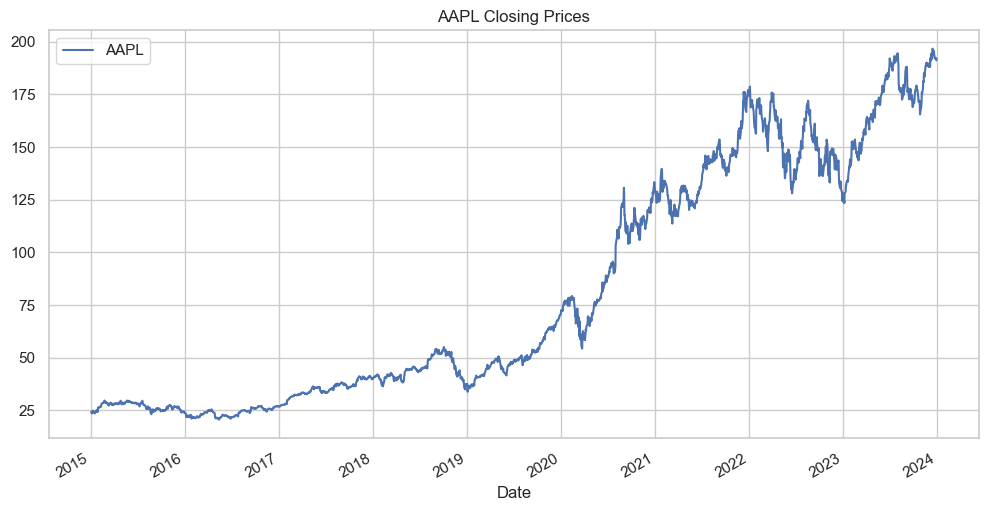

In [3]:
# Plot closing prices
data.plot(title=f"{ticker} Closing Prices", figsize=(12, 6))
plt.show()

In [4]:
# ADF test for stationarity
result = adfuller(data[ticker])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")

ADF Statistic: 0.24379300746274477
p-value: 0.9746135800973935


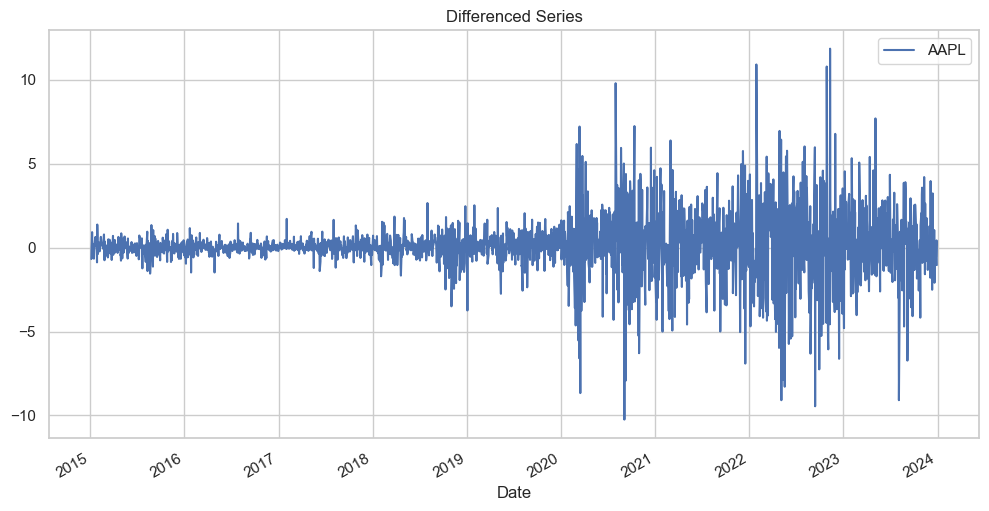

In [5]:
# Differencing if necessary
data_diff = data.diff().dropna()
data_diff.plot(title="Differenced Series", figsize=(12, 6))
plt.show()

In [6]:
# Split into train and test
train = data[:-365]
test = data[-365:]

In [7]:
from pmdarima import auto_arima

# Automatically select best ARIMA model
auto_model = auto_arima(
    train, 
    seasonal=False, 
    trace=True, 
    error_action='ignore', 
    suppress_warnings=True, 
    stepwise=True
)

print(f"Selected ARIMA order: {auto_model.order}")

# Forecast the test period
forecast = auto_model.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7150.995, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7151.250, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7146.048, Time=0.14 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7145.844, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7152.467, Time=0.05 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7147.341, Time=0.21 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7147.525, Time=0.28 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7149.336, Time=1.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7147.507, Time=0.08 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.400 seconds
Selected ARIMA order: (0, 1, 1)


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1

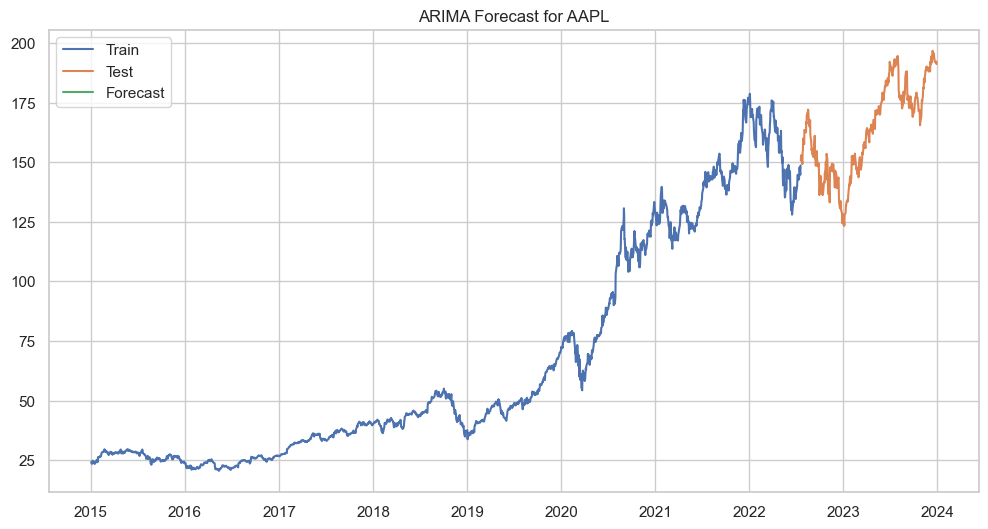

In [8]:
# Plot forecast vs actual
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Forecast")
plt.title(f"ARIMA Forecast for {ticker}")
plt.legend()
plt.show()

In [17]:
# 1. Drop NaNs from training data
train = train.dropna()

# 2. Fit ARIMA model
auto_model = auto_arima(train, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
print("Fitted model order:", auto_model.order)

# 3. Forecast
forecast = auto_model.predict(n_periods=len(test))
forecast = pd.Series(forecast, index=test.index)

# 4. Clean up for evaluation
true = test[ticker].values
pred = forecast.values

# Debug: check for NaNs/Infs
print("NaNs in forecast:", np.isnan(pred).sum())

# 5. Drop any remaining invalid values before evaluation
mask = ~np.isnan(true) & ~np.isnan(pred) & ~np.isinf(true) & ~np.isinf(pred)
true_clean = true[mask]
pred_clean = pred[mask]




print("Length of cleaned true:", len(true_clean))
print("Length of cleaned pred:", len(pred_clean))
print("true_clean[:5]:", true_clean[:5])
print("pred_clean[:5]:", pred_clean[:5])


# 6. Evaluate
mse = mean_squared_error(true_clean, pred_clean)
mae = mean_absolute_error(true_clean, pred_clean)

print(f"MSE: {mse:.4f}")
print(f"MAE: {mae:.4f}")


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\d

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=7150.995, Time=1.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=7151.250, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=7146.048, Time=0.16 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=7145.844, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=7152.467, Time=0.04 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=7147.341, Time=0.21 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=7147.525, Time=0.28 sec


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=7149.336, Time=1.13 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=7147.507, Time=0.10 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 3.434 seconds
Fitted model order: (0, 1, 1)
NaNs in forecast: 365
Length of cleaned true: 0
Length of cleaned pred: 0
true_clean[:5]: []
pred_clean[:5]: []


c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
c:\Users\micha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1

ValueError: Found array with 0 sample(s) (shape=(0,)) while a minimum of 1 is required.

In [ ]:
# Save forecast vs. actual to CSV
results_df = pd.DataFrame({
    "Actual": test[ticker],
    "Forecast": forecast
})
results_df.to_csv("../output/predictions.csv")
print("Forecast saved to output/predictions.csv")

In [ ]:
# Plot forecast vs actual and save
plt.figure(figsize=(12,6))
plt.plot(train, label="Train")
plt.plot(test, label="Test")
plt.plot(forecast, label="Forecast")
plt.title(f"ARIMA Forecast for {ticker}")
plt.legend()
plt.savefig("../output/arima_forecast.png")
print("Plot saved to output/arima_forecast.png")
plt.show()